In [ ]:
from prf_api.prf_api import PRFApi

import pandas as pd
import numpy as np

## Getting the data

In [ ]:
data = PRFApi()

In [ ]:
infracoes_df = data.dataframe('infracoes', estado='RN', anos=list(range(2007, 2019)))

>>> Criando dataframe com ano 2007...
>>> Criando dataframe com ano 2008...
>>> Criando dataframe com ano 2009...
>>> Criando dataframe com ano 2010...
>>> Criando dataframe com ano 2011...
>>> Criando dataframe com ano 2012...
>>> Criando dataframe com ano 2013...
>>> Criando dataframe com ano 2014...
>>> Criando dataframe com ano 2015...


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


>>> Criando dataframe com ano 2016...


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


>>> Criando dataframe com ano 2017...
>>> Criando dataframe com ano 2018...


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


### Analisando o dataset

Nesta seção, são feitas observações mais superficiais do dataset, buscando pontos de melhoria e inconsistências

In [ ]:
infracoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641908 entries, 0 to 641907
Data columns (total 22 columns):
cod_infracao               141782 non-null float64
dat_infracao               641908 non-null object
data_fim_vigencia          486313 non-null object
data_inicio_vigencia       641908 non-null object
descricao_abreviada        641908 non-null object
enquadramento              641908 non-null object
especie                    626005 non-null object
exc_verificado             273502 non-null float64
hora                       280798 non-null object
ind_assinou_auto           129681 non-null object
ind_sentido_trafego        513466 non-null object
ind_veiculo_estrangeiro    641908 non-null object
med_considerada            282002 non-null float64
med_realizada              282003 non-null float64
nom_modelo_veiculo         603485 non-null object
nom_municipio              641907 non-null object
nome_veiculo_marca         513460 non-null object
num_br_infracao            641908 n

Alguns pontos foram observados:

- O campo `dat_infracao`, `data_inicio_vigencia` e `data_fim_vigencia` devem ser campos datetime
- Campos importantes como `hora`, `uf_infracao`, `cod_infracao`,  `tip_abordagem`, entre outros, apresentam poucos dados faltantes (which is nice)
- `ind_assinou_auto`, `uf_placa`, `ind_sentido_trafego`, `especie` podem ser características relevantes , mas possuem uma porcentagem de dados faltantes
- `hora` deveria ser timestamp

In [ ]:
infracoes_df.describe()

,cod_infracao,exc_verificado,med_considerada,med_realizada,num_br_infracao,num_km_infracao
count,141782.000000,273502.000000,2.820020e+05,2.820030e+05,641908.000000,641908.000000
mean,64196.989688,73.902882,5.644966e+02,5.740050e+02,245.313684,115.780006
std,8695.124776,1797.338828,7.598502e+03,8.095999e+03,116.999887,78.430009
min,50100.000000,-11000.000000,-3.000000e-02,0.000000e+00,0.000000,0.000000
25%,57970.000000,0.000000,0.000000e+00,0.000000e+00,101.000000,66.000000
50%,66102.000000,0.000000,2.750000e-01,3.200000e-01,304.000000,102.000000
75%,72422.000000,8.000000,8.900000e+01,9.600000e+01,304.000000,146.000000
max,76332.000000,815910.000000,3.065910e+06,3.065910e+06,427.000000,3205.000000


O único campo que gerou estranheza foi o `num_br_infracao`, visto que o maior número possível de BR é 610 e a menor é 010, mas no dataset aparecem apenas aqueles entre 101 e 427.

In [ ]:
infracoes_df.head()

,cod_infracao,dat_infracao,data_fim_vigencia,data_inicio_vigencia,descricao_abreviada,enquadramento,especie,exc_verificado,hora,ind_assinou_auto,ind_sentido_trafego,ind_veiculo_estrangeiro,med_considerada,med_realizada,nom_modelo_veiculo,nom_municipio,nome_veiculo_marca,num_br_infracao,num_km_infracao,tip_abordagem,uf_infracao,uf_placa
0,NaN,2007-05-01,2016-10-31,2000-01-01,Deixar de dar preferÃªncia nas interseÃ§Ãµes c...,215 II,PASSAGEIRO,NaN,NaN,S,C,N,NaN,NaN,NaN,CEARA-MIRIM,GM,406.0,151,C,RN,RN
1,NaN,2007-05-01,2016-10-31,2000-01-01,Conduzir o veÃ­culo com equipamento obrigatÃ³r...,230 IX,PASSAGEIRO,NaN,NaN,S,D,N,NaN,NaN,NaN,MACAIBA,MERCEDES BENZ,304.0,294,C,RN,RN
2,NaN,2007-05-01,2012-12-31,2000-01-01,Executar operaÃ§Ã£o de conversÃ£o Ã esquerda ...,207,PASSAGEIRO,NaN,NaN,S,D,N,NaN,NaN,NaN,PARNAMIRIM,HONDA,101.0,107,C,RN,RN
3,NaN,2007-05-01,2008-02-15,2000-01-01,Conduzir o veÃ­culo que nÃ£o esteja registrado...,230 V,PASSAGEIRO,NaN,NaN,S,D,N,NaN,NaN,NaN,MACAIBA,GM,304.0,294,C,RN,RN
4,NaN,2007-05-01,2016-10-31,2000-01-01,Dirigir veÃ­culo sem possuir CNH ou PermissÃ£o...,162 I,CARGA,NaN,NaN,S,D,N,NaN,NaN,NaN,CURRAIS NOVOS,MERCEDES BENZ,226.0,161,C,RN,RN


In [ ]:
infracoes_df.query('nom_municipio == "PARELHAS" ')

,cod_infracao,dat_infracao,data_fim_vigencia,data_inicio_vigencia,descricao_abreviada,enquadramento,especie,exc_verificado,hora,ind_assinou_auto,ind_sentido_trafego,ind_veiculo_estrangeiro,med_considerada,med_realizada,nom_modelo_veiculo,nom_municipio,nome_veiculo_marca,num_br_infracao,num_km_infracao,tip_abordagem,uf_infracao,uf_placa
7974,NaN,2007-10-19,2016-10-31,2000-01-01,Parar na pista de rolamento das rodovias,182-V,PASSAGEIRO,NaN,NaN,NaN,C,N,NaN,NaN,NaN,PARELHAS,GM,101.0,105,S,RN,RN
7975,NaN,2007-10-19,2016-10-31,2000-01-01,Executar operaÃ§Ã£o de retorno em locais proib...,206 I,PASSAGEIRO,NaN,NaN,NaN,C,N,NaN,NaN,NaN,PARELHAS,VW,101.0,105,S,RN,RN
7976,NaN,2007-10-19,2016-10-31,2000-01-01,Executar operaÃ§Ã£o de retorno em locais proib...,206 I,PASSAGEIRO,NaN,NaN,NaN,C,N,NaN,NaN,NaN,PARELHAS,FIAT,101.0,105,S,RN,RN
16813,NaN,2007-01-26,2016-10-31,2000-01-01,Conduzir o veÃ­culo transportando passageiros ...,230 II,CARGA,NaN,NaN,S,C,N,NaN,NaN,NaN,PARELHAS,FORD,101.0,108,C,RN,PE
23493,NaN,2007-03-16,2016-10-31,2000-01-01,Conduzir veÃ­culo sem os documentos de porte o...,232,PASSAGEIRO,NaN,NaN,S,D,N,NaN,NaN,NaN,PARELHAS,HONDA,304.0,307,C,RN,RN
26357,NaN,2007-04-16,2016-10-31,2000-01-01,Deixar de dar passagem pela esquerda quando so...,198,PASSAGEIRO,NaN,NaN,S,D,N,NaN,NaN,NaN,PARELHAS,HONDA,101.0,105,C,RN,RN
32384,NaN,2008-05-12,2012-12-31,2000-01-01,"NÃ£o lanÃ§ar no documento fiscal, as informaÃ§...",46 I c,CARGA,NaN,NaN,S,C,N,NaN,NaN,23.220,PARELHAS,VW,101.0,105,C,RN,PE
76726,NaN,2009-09-08,2016-10-31,2000-01-01,Conduzir o veÃ­culo c/ equip do sistema de ilu...,230 XIII,CARGA,NaN,NaN,S,C,N,NaN,NaN,I/TOYOTA HILUX C,PARELHAS,TOYOTA,101.0,101,C,RN,RN
121159,NaN,2009-12-28,2016-10-31,2000-01-01,Conduzir o veÃ­culo com qualquer uma das placa...,230 VI,PASSAGEIRO,NaN,NaN,S,D,N,NaN,NaN,GM/ZAFIRA COMFOR,PARELHAS,GM,304.0,305,C,RN,RN
559236,50100.0,2017-11-24,NaN,2016-11-01,Dirigir veículo sem possuir CNH/PPD/ACC,162 I,PASSAGEIRO,0.0,15:32:00,NaN,C,N,0.0,0.0,CG 150 TITAN EX,PARELHAS,HONDA,427.0,38,C,RN,RN


## Tratando os dados

O tratamento dos dados consistirá da correção dos  pontos vistos anteriormente


In [ ]:
# Converte campos de data
infracoes_df.dat_infracao = pd.to_datetime(infracoes_df.dat_infracao,
                                           format='%Y-%m-%d')
infracoes_df.data_fim_vigencia = pd.to_datetime(infracoes_df.data_fim_vigencia,
                                                format='%Y-%m-%d')
infracoes_df.data_inicio_vigencia = pd.to_datetime(infracoes_df.data_inicio_vigencia,
                                                   format='%Y-%m-%d')


In [ ]:
infracoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641908 entries, 0 to 641907
Data columns (total 22 columns):
cod_infracao               141782 non-null float64
dat_infracao               641908 non-null datetime64[ns]
data_fim_vigencia          486313 non-null datetime64[ns]
data_inicio_vigencia       641908 non-null datetime64[ns]
descricao_abreviada        641908 non-null object
enquadramento              641908 non-null object
especie                    626005 non-null object
exc_verificado             273502 non-null float64
hora                       280798 non-null object
ind_assinou_auto           129681 non-null object
ind_sentido_trafego        513466 non-null object
ind_veiculo_estrangeiro    641908 non-null object
med_considerada            282002 non-null float64
med_realizada              282003 non-null float64
nom_modelo_veiculo         603485 non-null object
nom_municipio              641907 non-null object
nome_veiculo_marca         513460 non-null object
num_br_infr

In [ ]:
# Testa a conversão para datas
infracoes_df.dat_infracao.dt.weekday_name.head()

0    Tuesday
1    Tuesday
2    Tuesday
3    Tuesday
4    Tuesday
Name: dat_infracao, dtype: object

Para lidar com os dados faltantes, serão removidos apenas as linhas que não possuem informação em algum dos atributos que foram tidos como os mais relevantes.

In [ ]:
# Remove linhas
infracoes_df.dropna(axis=0, subset=['hora', 'ind_sentido_trafego', 'uf_placa', 
                                    'nom_modelo_veiculo'], how='any', inplace=True)

# Visualiza novo tamanho do dataset
infracoes_df.shape

(212843, 22)

Outro tratamento importante é categorizar o horário do dia. Dividiremos em:
- Manhã
- Tarde
- Noite
- Madrugada

In [ ]:
def categoriza_horario(row):
  hora = row['hora']
  if hora >= '05:00' and hora < '12:00':
    return 'MANHÃ'
  elif hora >= '12:00' and hora < '17:59':
    return 'TARDE'
  elif hora >= '18:00' and hora < '23:59':
    return 'NOITE'
  else:
    return 'MADRUGADA'

infracoes_df['horario'] = infracoes_df.apply(categoriza_horario, axis=1)

In [ ]:
infracoes_df.query("enquadramento == ''")

,cod_infracao,dat_infracao,data_fim_vigencia,data_inicio_vigencia,descricao_abreviada,enquadramento,especie,exc_verificado,hora,ind_assinou_auto,ind_sentido_trafego,ind_veiculo_estrangeiro,med_considerada,med_realizada,nom_modelo_veiculo,nom_municipio,nome_veiculo_marca,num_br_infracao,num_km_infracao,tip_abordagem,uf_infracao,uf_placa,horario,dia_semana


## Explorando os dados

Análise visual dos dados, guiada por algumas perguntas:
 - Em quais dias da semanas ocorrem mais infrações? E em quais horários?
 - Quais infrações são mais comuns?
 - Quantas infrações feitas em estados diferentes dos da placa?
 - Em feriados são mais frequentes?

In [ ]:
# Importando bibliotecas
import seaborn as sns

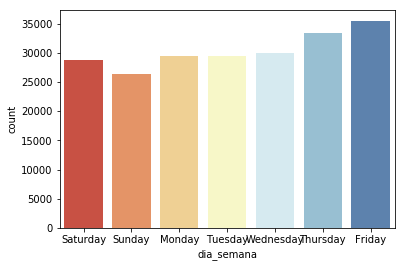

In [ ]:
infracoes_df['dia_semana'] = infracoes_df.dat_infracao.dt.weekday_name
sns.countplot(x='dia_semana', data=infracoes_df, palette='RdYlBu')

Para responder a primeira pergunta, vemos que os dias em que mais acontecem infrações são na quinta-feira e na sexta-feira. Domingo é o dias em que menos infrações são feitas.

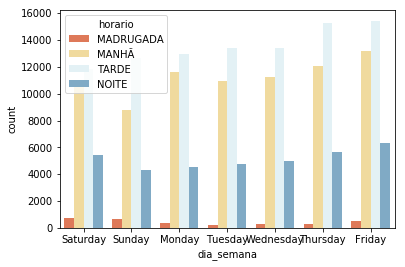

In [ ]:
sns.countplot(x='dia_semana', hue='horario', data=infracoes_df, palette='RdYlBu')

Em todos os dias da semana, a grande maioria das infrações ocorre durante a tarde e a manhã, respectivamente. A madrugada é o período no qual menos infrações são notificadas.

A maior diferença é encontrada na terça, enquanto no domingo são feitas quase o memsmo numero de infrações durante a manhã e a tarde.

In [ ]:
# Recupera as 5 infracoes mais comuns
most_common_violations = infracoes_df.enquadramento.value_counts(normalize=True).head()

most_common_violations

250 I b    0.104744
162 I      0.092730
230 * V    0.084259
203 V      0.073947
167        0.051503
Name: enquadramento, dtype: float64

In [ ]:
for violation in most_common_violations.index:
  description = infracoes_df.query("enquadramento == '" + violation+ "'").tail(1).descricao_abreviada.values
  print(description)

['Em movimento de dia, deixar de manter acesa luz baixa nas rodovias.']
['Dirigir veículo sem possuir CNH/PPD/ACC']
['Conduzir o veículo registrado que não esteja devidamente licenciado']
['Ultrapassar pela contramão linha de divisão de fluxos opostos, contínua amarela']
['Deixar o passageiro de usar o cinto segurança']


A infração mais comum entre 2017 e 2018 é aquela cometida ao deixar os faróis apagados durante as BRs, o que poderia ser explicado por ser uma medida relativamente nova e algo que pode ser facilmente esquecido pelo condutor.

Os motivos de multas que seguem em segundo e terceiro lugar são violações mais graves e chegam a ser mais preocupantes, visto que o fato do veículo estar em rodovia federal apresenta um enorme perigo para todos, sendo ou motorista desqualificado ou o veículo irregular.

O quarto lugar também é uma infração grave e que compromete a segurança de todos.